In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
"""
   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)
"""

data_wine = pd.read_csv('data/red_wine.csv', sep=';')

In [3]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
def impute_quality(cols):
        qual = cols
        
        if qual < 5:
            return 0

        else:
            return 1   

In [8]:
data_wine['qual_binary'] = data_wine['quality'].apply(impute_quality)

In [9]:
"""
quality < 5 = 0
quality > 5 = 1
"""

data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [10]:
data_wine['qual_binary'].value_counts()

1    1536
0      63
Name: qual_binary, dtype: int64

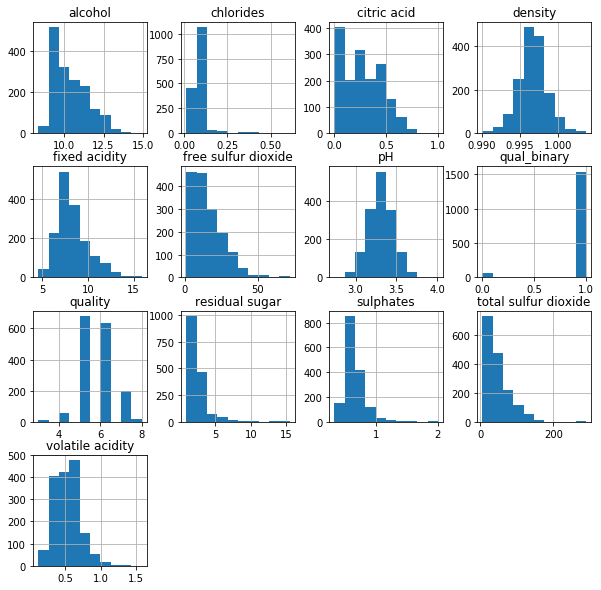

In [11]:
"""
'free sulfur dioxide' ranges from 0 to ~70
'volatile acidity' from ~0 to ~1.2.
"""

pd.DataFrame.hist(data_wine, figsize=[10,10]);

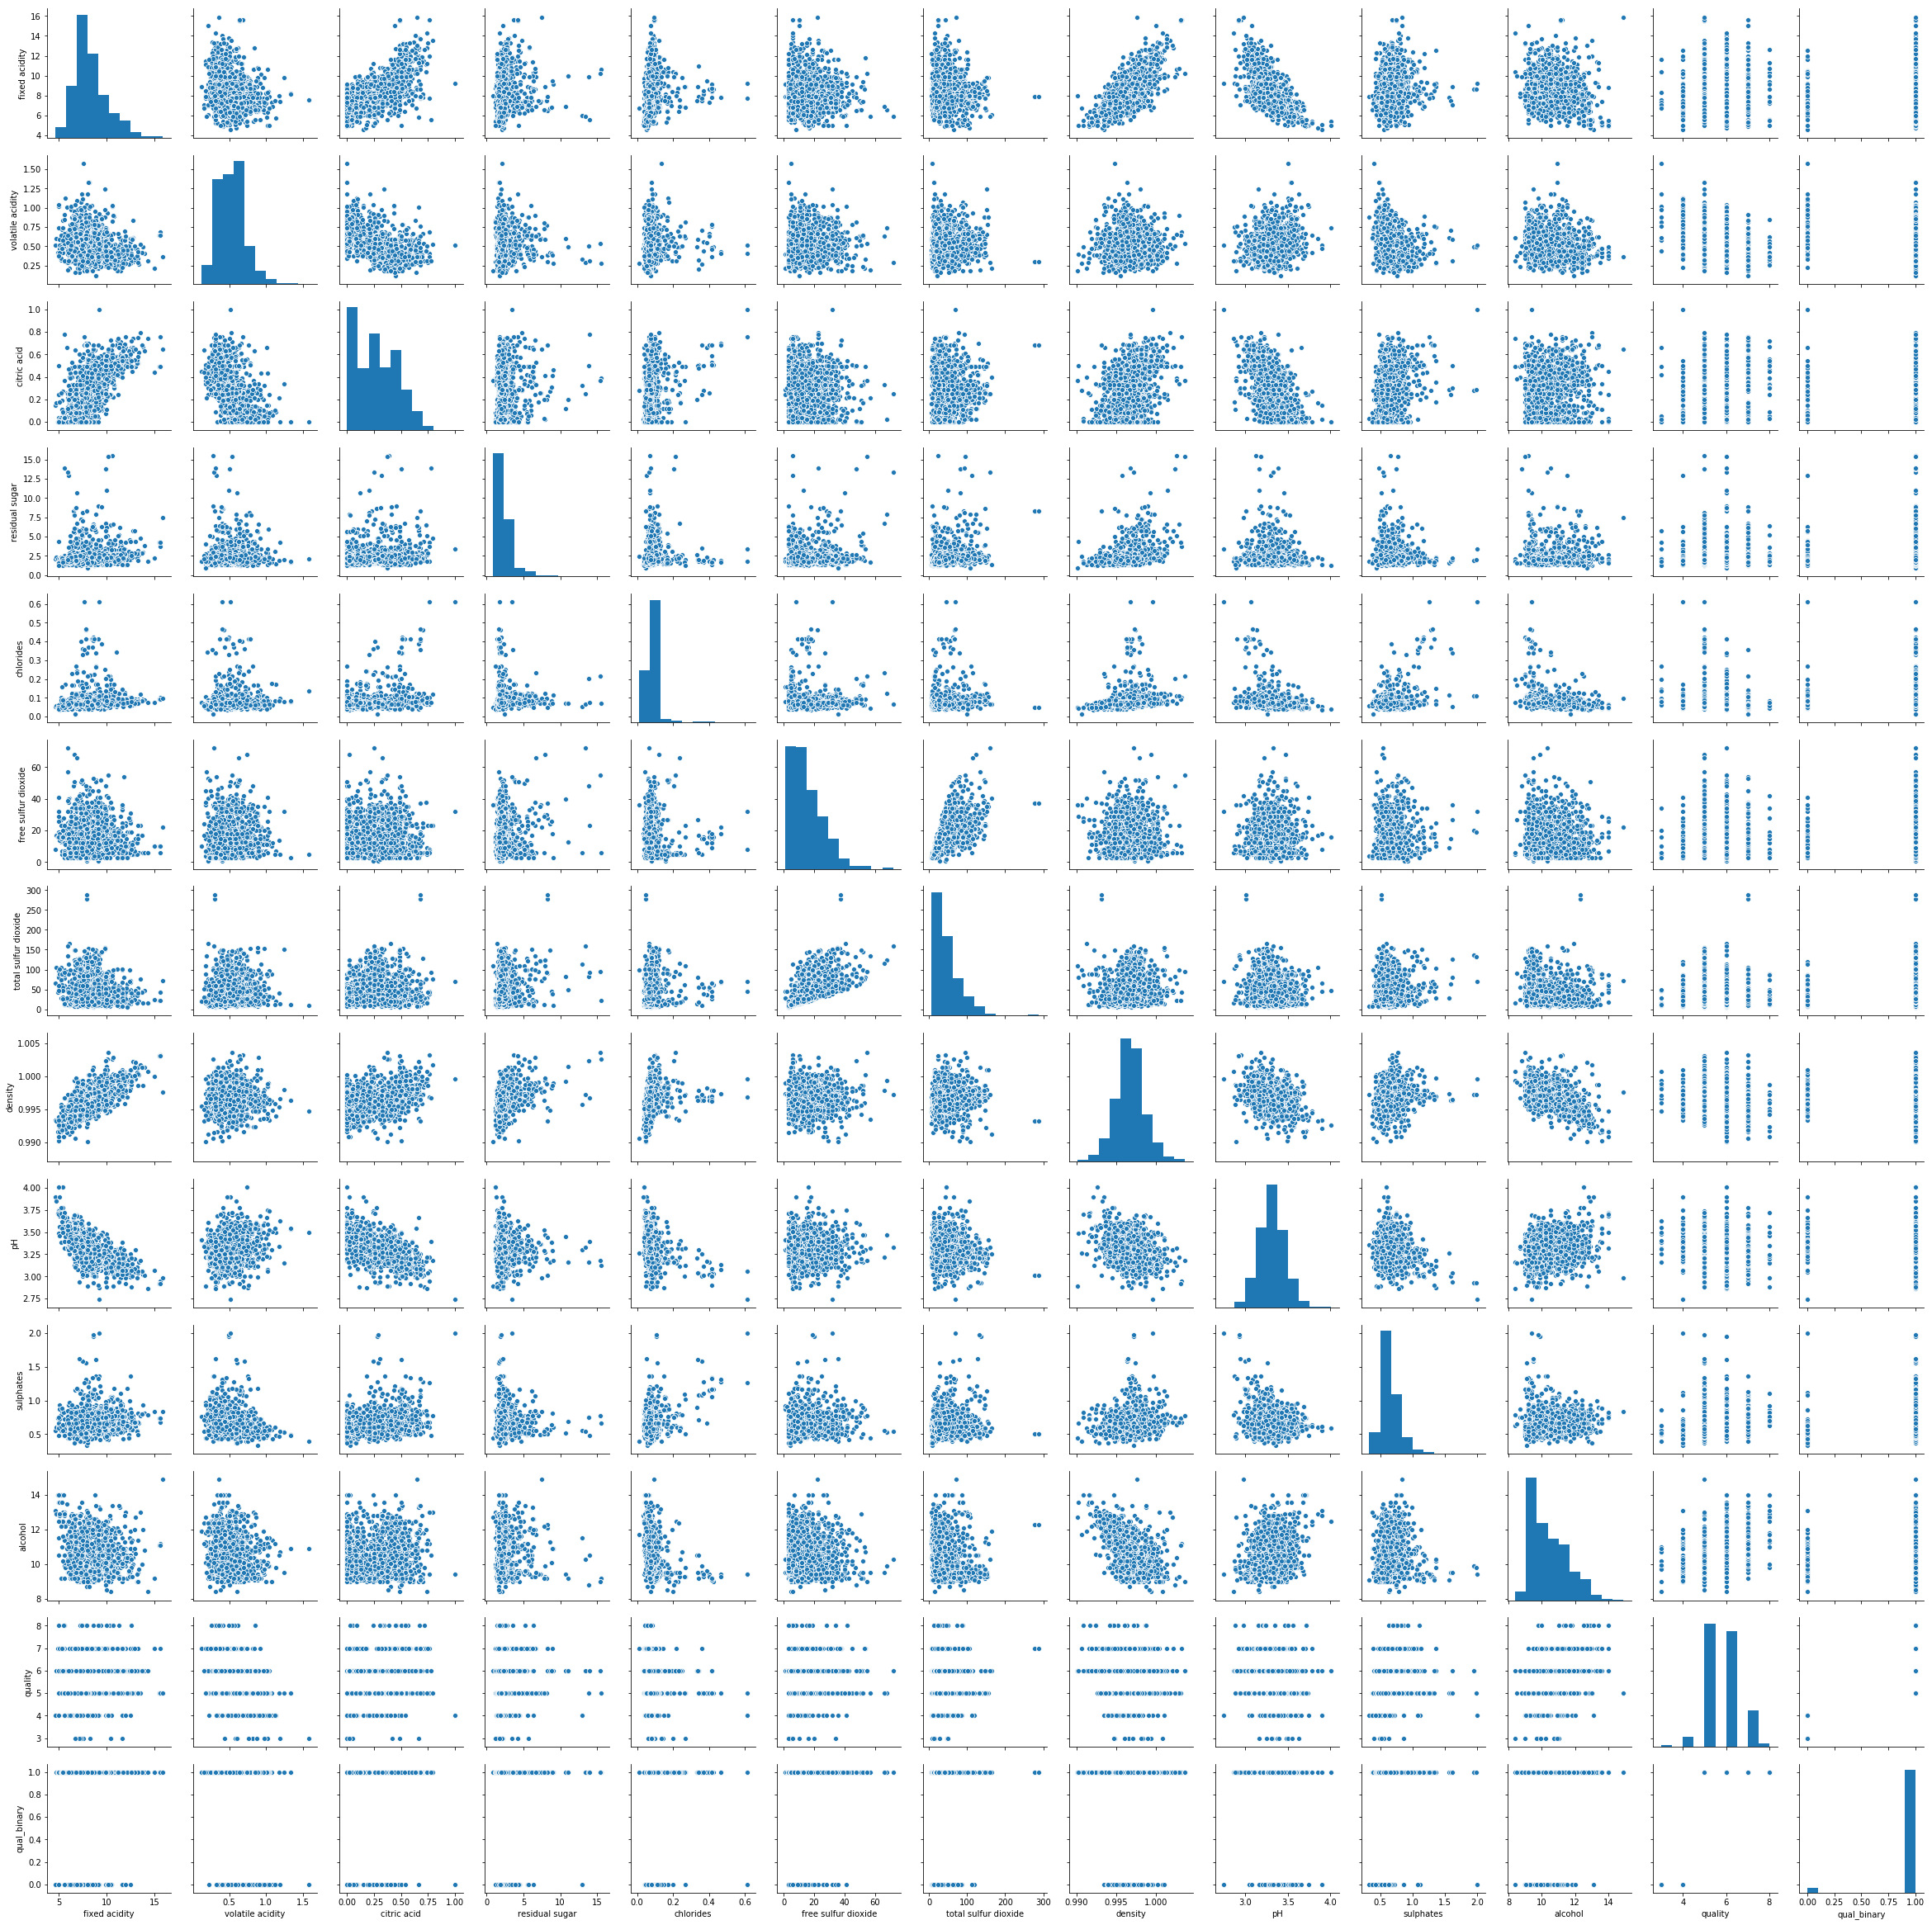

In [12]:
sns.pairplot(data_wine);

/Users/davidtorres/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


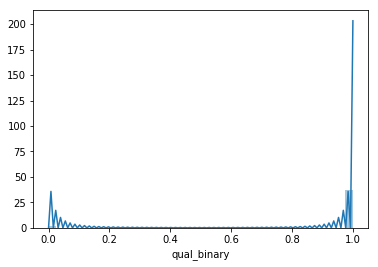

In [13]:
sns.distplot(data_wine['qual_binary']);

In [14]:
X = data_wine.drop(['quality','qual_binary'], axis=1)
y = data_wine['qual_binary']

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

In [16]:
scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [17]:
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

In [18]:
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [19]:
X = scaled_df

In [20]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

In [23]:
print(metrics.accuracy_score(y_test,pred))

0.9645833333333333


In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix: \n', metrics.confusion_matrix(y_test,pred))
print('----------------------------')
print('Classification Report: \n', metrics.classification_report(y_test, pred))

Confusion Matrix: 
 [[  1  17]
 [  0 462]]
----------------------------
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      0.06      0.11        18
          1       0.96      1.00      0.98       462

avg / total       0.97      0.96      0.95       480



In [34]:
"""
accuracy          TP + TN/total

Misclassification Rate FP + FN/total  - how often is model wrong

Precision       TP /TP + FP
Recall          TP / TP + FN
f1 score        2 * precision * recall / precision + recall   0.067  /0.035 + 0.962 (0.997)
"""
print('Accuracy: ', 463/480)
print('Misclassification Rate: ', 17/480)
print('Precision: ', 462/480)
print('Recall: ', 462/462)

Accuracy:  0.9645833333333333
Misclassification Rate:  0.035416666666666666
Precision:  0.9625
Recall:  1.0


In [27]:
error_rate = []
for i in range(1,40):
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    pred_i = knn_i.predict(X_test) 
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

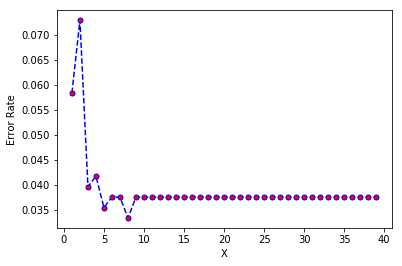

In [26]:
plt.plot(range(1,40),error_rate, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.xlabel('X')
plt.ylabel('Error Rate')

In [37]:
knn_1 = KNeighborsClassifier(n_neighbors=15)
knn_1.fit(X_train, y_train)
pred_1 = knn_1.predict(X_test)
print(metrics.accuracy_score(y_test, pred_1))

0.9625


Cross Validation 

In [38]:
from sklearn.model_selection import cross_val_score

In [42]:
scores = cross_val_score(knn,X,y,cv=10, scoring='accuracy')
print(scores)
print('Scores mean:  \n', scores.mean())

[0.94409938 0.95652174 0.95652174 0.9625     0.9625     0.9625
 0.96226415 0.96226415 0.96226415 0.96226415]
Scores mean:  
 0.9593699460916442


In [43]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

Text(0,0.5,'Cross Validation Accuracy')

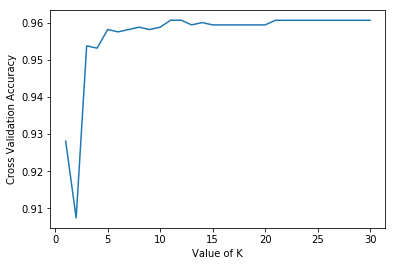

In [46]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross Validation Accuracy')